In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geonomics as gnx
from evodoodle import init_mod, draw_landscape, edit_landscape, plot_popgen, plot_landscapes
from gnx_params import params

population_size = np.loadtxt('population_size.csv', delimiter=',')
connectivity = np.loadtxt('connectivity.csv', delimiter=',')
environment = np.loadtxt('environment.csv', delimiter=',')

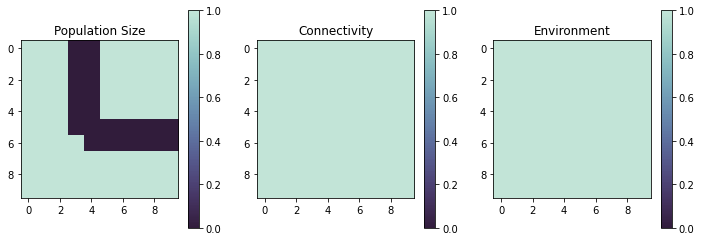

In [57]:
plot_landscapes(population_size, connectivity, environment)

In [ ]:
def get_stats(mod):
    spp = mod.comm[0]
    Nt = gnxstats._calc_Nt(spp)
    het = gnxstats._calc_het(spp, mean=True)
    mean_fit = gnxstats._calc_mean_fitness(spp)
    t = spp.t

    data = {
        'Nt': Nt,
        'Heterozygosity': het,
        'Mean Fitness': mean_fit,
        'Time': t
    }
    
    return data

def update_stats(mod, stats_dict):
    new_stats = get_stats(mod)
    for key, value in new_stats.items():
        stats_dict[key].append(value)

def stats_walk(mod, t=100, inc=10):
    # Initialize stats dictionary
    stats_dict = {
        'Nt': [],
        'Heterozygosity': [],
        'Mean Fitness': [],
        'Time': []
    }

    # Perform initial calculation
    update_stats(mod, stats_dict)
    
    # Calculate how many iterations to run
    its = t//inc
    
    # Walk and update stats
    for _ in range(its):  # Adjust the range as needed
        mod.walk(inc)
        update_stats(mod, stats_dict)

    # Now `stats_dict` contains the updated statistics after each walk
    return stats_dict



def plot_stats(stats):
    # Extract data
    time = stats['Time']
    nt = stats['Nt']
    het = stats['Heterozygosity']
    mean_fit = stats['Mean Fitness']

    # Create subplots
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plot Nt over time
    axs[0].plot(time, nt, marker='o', linestyle='-', color='b')
    axs[0].set_title('Nt over Time')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Nt')

    # Plot Heterozygosity over time
    axs[1].plot(time, het, marker='o', linestyle='-', color='g')
    axs[1].set_title('Heterozygosity over Time')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Heterozygosity')

    # Plot Mean Fitness over time
    axs[2].plot(time, mean_fit, marker='o', linestyle='-', color='r')
    axs[2].set_title('Mean Fitness over Time')
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Mean Fitness')

    # Adjust layout
    plt.tight_layout()

    # Show plots
    plt.show()
    
import stats as gnxstats


In [56]:

# Draw your landscape carrying capacity
# When you run this chunk a pop-up will appear where you can draw on your own landscape
# Note: d sets the dimensions of your square landscape in terms of the number of cells
population_size = draw_landscape(d = 10)


In [ ]:
# Draw your landscape connectivity
connectivity = draw_landscape(d = 10)

In [50]:
# Draw your environment for local adaptation
environment = draw_landscape(d = 10)

In [58]:
import importlib
import gnx_params

# Reload the module to reflect changes in the gnx_params file
importlib.reload(gnx_params)

from gnx_params import params
params['comm']['species']['spp_0']['gen_arch']['mu_neut'] = 1e-06

In [59]:
# Start model
mod = init_mod(params, population_size, connectivity, environment)


MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...

			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=330	(births=102	deaths=272)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=283	(births=74	deaths=121)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=267	(births=47	deaths=63)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=234	(births=54	deaths=87)

	........................................................................
burn:	it=-1:	t=4


/home/anushabishop/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/anushabishop/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


burn:	it=-1:	t=41
	species: spp_0                         N=186	(births=39	deaths=38)

	........................................................................
burn:	it=-1:	t=42
	species: spp_0                         N=201	(births=39	deaths=24)

	........................................................................
burn:	it=-1:	t=43
	species: spp_0                         N=193	(births=38	deaths=46)

	........................................................................
burn:	it=-1:	t=44
	species: spp_0                         N=202	(births=40	deaths=31)

	........................................................................
burn:	it=-1:	t=45
	species: spp_0                         N=187	(births=36	deaths=51)

	........................................................................
burn:	it=-1:	t=46
	species: spp_0                         N=193	(births=28	deaths=22)

	........................................................................
burn:	it=-1:	t=47
	species: spp_0 

In [60]:
stats = stats_walk(mod, t=1000)



main:	it=-1:	t=0
	species: spp_0                         N=176	(births=30	deaths=29)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 2960,  LOCUS 1924
	 timestep 1


main:	it=-1:	t=1
	species: spp_0                         N=180	(births=54	deaths=50)

	........................................................................
main:	it=-1:	t=2
	species: spp_0                         N=170	(births=27	deaths=37)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 3044,  LOCUS 8700
	 timestep 3


main:	it=-1:	t=3
	species: spp_0                         N=171	(births=28	deaths=27)

	........................................................................
main:	it=-1:	t=4
	species: spp_0                         N=170	(births=36	deaths=37)

	........................................................................
main:	it=-1:	t=5
	species: spp_0                         N=164	(births=36	de

main:	it=-1:	t=45
	species: spp_0                         N=185	(births=35	deaths=39)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 4584,  LOCUS 2392
	 timestep 46


main:	it=-1:	t=46
	species: spp_0                         N=200	(births=37	deaths=22)

	........................................................................
main:	it=-1:	t=47
	species: spp_0                         N=199	(births=32	deaths=33)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 4657,  LOCUS 3205
	 timestep 48


main:	it=-1:	t=48
	species: spp_0                         N=191	(births=40	deaths=48)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 4699,  LOCUS 6046
	 timestep 49


main:	it=-1:	t=49
	species: spp_0                         N=184	(births=35	deaths=42)

	........................................................................


main:	i

main:	it=-1:	t=89
	species: spp_0                         N=199	(births=31	deaths=27)

	........................................................................


main:	it=-1:	t=90
	species: spp_0                         N=201	(births=41	deaths=39)

	........................................................................
main:	it=-1:	t=91
	species: spp_0                         N=209	(births=46	deaths=38)

	........................................................................
main:	it=-1:	t=92
	species: spp_0                         N=211	(births=42	deaths=40)

	........................................................................
main:	it=-1:	t=93
	species: spp_0                         N=191	(births=39	deaths=59)

	........................................................................
main:	it=-1:	t=94
	species: spp_0                         N=196	(births=28	deaths=23)

	........................................................................
main:	it=-1:	t=95
	species: spp_

main:	it=-1:	t=133
	species: spp_0                         N=202	(births=39	deaths=25)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 7876,  LOCUS 4673
	 timestep 134


main:	it=-1:	t=134
	species: spp_0                         N=196	(births=45	deaths=51)

	........................................................................
main:	it=-1:	t=135
	species: spp_0                         N=193	(births=34	deaths=37)

	........................................................................
main:	it=-1:	t=136
	species: spp_0                         N=185	(births=37	deaths=45)

	........................................................................
main:	it=-1:	t=137
	species: spp_0                         N=184	(births=44	deaths=45)

	........................................................................
main:	it=-1:	t=138
	species: spp_0                         N=191	(births=36	deaths=29)

	......................................

main:	it=-1:	t=178
	species: spp_0                         N=184	(births=39	deaths=26)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 9611,  LOCUS 9406
	 timestep 179


main:	it=-1:	t=179
	species: spp_0                         N=173	(births=39	deaths=50)

	........................................................................


main:	it=-1:	t=180
	species: spp_0                         N=182	(births=38	deaths=29)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 9674,  LOCUS 7394
	 timestep 181


MUTATION: neut
	 INDIVIDUAL 9679,  LOCUS 4188
	 timestep 181


main:	it=-1:	t=181
	species: spp_0                         N=189	(births=38	deaths=31)

	........................................................................
main:	it=-1:	t=182
	species: spp_0                         N=198	(births=38	deaths=29)

	........................................................................

main:	it=-1:	t=220
	species: spp_0                         N=189	(births=48	deaths=39)

	........................................................................
main:	it=-1:	t=221
	species: spp_0                         N=199	(births=31	deaths=21)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 11364,  LOCUS 4825
	 timestep 222


main:	it=-1:	t=222
	species: spp_0                         N=203	(births=39	deaths=35)

	........................................................................
main:	it=-1:	t=223
	species: spp_0                         N=201	(births=38	deaths=40)

	........................................................................
main:	it=-1:	t=224
	species: spp_0                         N=198	(births=46	deaths=49)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 11499,  LOCUS 8987
	 timestep 225


main:	it=-1:	t=225
	species: spp_0                         N=1

main:	it=-1:	t=264
	species: spp_0                         N=191	(births=33	deaths=38)

	........................................................................
main:	it=-1:	t=265
	species: spp_0                         N=190	(births=31	deaths=32)

	........................................................................
main:	it=-1:	t=266
	species: spp_0                         N=186	(births=41	deaths=45)

	........................................................................
main:	it=-1:	t=267
	species: spp_0                         N=197	(births=39	deaths=28)

	........................................................................
main:	it=-1:	t=268
	species: spp_0                         N=195	(births=35	deaths=37)

	........................................................................
main:	it=-1:	t=269
	species: spp_0                         N=180	(births=54	deaths=69)

	........................................................................


main:	it=-1:	t=270
	specie



main:	it=-1:	t=310
	species: spp_0                         N=171	(births=31	deaths=32)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 14709,  LOCUS 1386
	 timestep 311


main:	it=-1:	t=311
	species: spp_0                         N=171	(births=31	deaths=31)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 14744,  LOCUS 1833
	 timestep 312


main:	it=-1:	t=312
	species: spp_0                         N=183	(births=32	deaths=20)

	........................................................................
main:	it=-1:	t=313
	species: spp_0                         N=191	(births=40	deaths=32)

	........................................................................
main:	it=-1:	t=314
	species: spp_0                         N=198	(births=47	deaths=40)

	........................................................................
main:	it=-1:	t=315
	species: spp_0                         N

MUTATION: neut
	 INDIVIDUAL 16370,  LOCUS 1634
	 timestep 355


main:	it=-1:	t=355
	species: spp_0                         N=179	(births=46	deaths=63)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 16435,  LOCUS 1562
	 timestep 356


main:	it=-1:	t=356
	species: spp_0                         N=195	(births=36	deaths=20)

	........................................................................
main:	it=-1:	t=357
	species: spp_0                         N=193	(births=37	deaths=39)

	........................................................................
main:	it=-1:	t=358
	species: spp_0                         N=204	(births=39	deaths=28)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 16536,  LOCUS 1369
	 timestep 359


main:	it=-1:	t=359
	species: spp_0                         N=197	(births=49	deaths=56)

	.......................................................................



MUTATION: neut
	 INDIVIDUAL 18168,  LOCUS 6007
	 timestep 400


main:	it=-1:	t=400
	species: spp_0                         N=185	(births=36	deaths=40)

	........................................................................
main:	it=-1:	t=401
	species: spp_0                         N=192	(births=50	deaths=43)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 18258,  LOCUS 5764
	 timestep 402


main:	it=-1:	t=402
	species: spp_0                         N=205	(births=34	deaths=21)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 18302,  LOCUS 8456
	 timestep 403


main:	it=-1:	t=403
	species: spp_0                         N=204	(births=42	deaths=43)

	........................................................................
main:	it=-1:	t=404
	species: spp_0                         N=188	(births=36	deaths=52)

	.....................................................................

MUTATION: neut
	 INDIVIDUAL 19965,  LOCUS 3423
	 timestep 444


main:	it=-1:	t=444
	species: spp_0                         N=195	(births=46	deaths=44)

	........................................................................
main:	it=-1:	t=445
	species: spp_0                         N=198	(births=39	deaths=36)

	........................................................................
main:	it=-1:	t=446
	species: spp_0                         N=196	(births=34	deaths=36)

	........................................................................
main:	it=-1:	t=447
	species: spp_0                         N=174	(births=41	deaths=63)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 20136,  LOCUS 8545
	 timestep 448


main:	it=-1:	t=448
	species: spp_0                         N=193	(births=38	deaths=19)

	........................................................................
main:	it=-1:	t=449
	species: spp_0                         N=1

main:	it=-1:	t=489
	species: spp_0                         N=179	(births=38	deaths=42)

	........................................................................


main:	it=-1:	t=490
	species: spp_0                         N=185	(births=32	deaths=26)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 21757,  LOCUS 4624
	 timestep 491


main:	it=-1:	t=491
	species: spp_0                         N=176	(births=29	deaths=38)

	........................................................................
main:	it=-1:	t=492
	species: spp_0                         N=180	(births=35	deaths=31)

	........................................................................
main:	it=-1:	t=493
	species: spp_0                         N=188	(births=35	deaths=27)

	........................................................................
main:	it=-1:	t=494
	species: spp_0                         N=175	(births=33	deaths=46)

	...................................

main:	it=-1:	t=531
	species: spp_0                         N=200	(births=34	deaths=29)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 23264,  LOCUS 2323
	 timestep 532


main:	it=-1:	t=532
	species: spp_0                         N=209	(births=45	deaths=36)

	........................................................................
main:	it=-1:	t=533
	species: spp_0                         N=205	(births=50	deaths=54)

	........................................................................
main:	it=-1:	t=534
	species: spp_0                         N=194	(births=38	deaths=49)

	........................................................................
main:	it=-1:	t=535
	species: spp_0                         N=194	(births=32	deaths=32)

	........................................................................
main:	it=-1:	t=536
	species: spp_0                         N=178	(births=41	deaths=57)

	.....................................

MUTATION: neut
	 INDIVIDUAL 24856,  LOCUS 9915
	 timestep 574


main:	it=-1:	t=574
	species: spp_0                         N=186	(births=39	deaths=32)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 24897,  LOCUS 2533
	 timestep 575


main:	it=-1:	t=575
	species: spp_0                         N=176	(births=38	deaths=48)

	........................................................................
main:	it=-1:	t=576
	species: spp_0                         N=175	(births=28	deaths=29)

	........................................................................
main:	it=-1:	t=577
	species: spp_0                         N=173	(births=31	deaths=33)

	........................................................................
main:	it=-1:	t=578
	species: spp_0                         N=176	(births=40	deaths=37)

	........................................................................
main:	it=-1:	t=579
	species: spp_0                         N=1

MUTATION: neut
	 INDIVIDUAL 26497,  LOCUS 8947
	 timestep 616


MUTATION: neut
	 INDIVIDUAL 26471,  LOCUS 1316
	 timestep 616


main:	it=-1:	t=616
	species: spp_0                         N=197	(births=49	deaths=56)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 26543,  LOCUS 3715
	 timestep 617


main:	it=-1:	t=617
	species: spp_0                         N=204	(births=38	deaths=31)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 26584,  LOCUS 3897
	 timestep 618


main:	it=-1:	t=618
	species: spp_0                         N=202	(births=45	deaths=47)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 26634,  LOCUS 7663
	 timestep 619


main:	it=-1:	t=619
	species: spp_0                         N=218	(births=44	deaths=28)

	........................................................................


main:	it=-1:	t=620
	species: s



MUTATION: neut
	 INDIVIDUAL 28267,  LOCUS 5952
	 timestep 660


main:	it=-1:	t=660
	species: spp_0                         N=199	(births=29	deaths=33)

	........................................................................
main:	it=-1:	t=661
	species: spp_0                         N=205	(births=34	deaths=28)

	........................................................................
main:	it=-1:	t=662
	species: spp_0                         N=190	(births=26	deaths=41)

	........................................................................
main:	it=-1:	t=663
	species: spp_0                         N=191	(births=40	deaths=39)

	........................................................................
main:	it=-1:	t=664
	species: spp_0                         N=171	(births=43	deaths=63)

	........................................................................
main:	it=-1:	t=665
	species: spp_0                         N=173	(births=46	deaths=44)

	...................................

MUTATION: neut
	 INDIVIDUAL 29964,  LOCUS 4780
	 timestep 706


main:	it=-1:	t=706
	species: spp_0                         N=194	(births=29	deaths=25)

	........................................................................
main:	it=-1:	t=707
	species: spp_0                         N=178	(births=42	deaths=58)

	........................................................................
main:	it=-1:	t=708
	species: spp_0                         N=174	(births=30	deaths=34)

	........................................................................
main:	it=-1:	t=709
	species: spp_0                         N=176	(births=31	deaths=29)

	........................................................................


MUTATION: neut
	 INDIVIDUAL 30094,  LOCUS 1617
	 timestep 710


main:	it=-1:	t=710
	species: spp_0                         N=184	(births=35	deaths=27)

	........................................................................
main:	it=-1:	t=711
	species: spp_0                         N

main:	it=-1:	t=749
	species: spp_0                         N=197	(births=33	deaths=36)

	........................................................................


main:	it=-1:	t=750
	species: spp_0                         N=189	(births=34	deaths=42)

	........................................................................
main:	it=-1:	t=751
	species: spp_0                         N=184	(births=39	deaths=44)

	........................................................................
main:	it=-1:	t=752
	species: spp_0                         N=184	(births=27	deaths=27)

	........................................................................
main:	it=-1:	t=753
	species: spp_0                         N=183	(births=30	deaths=31)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 31664,  LOCUS 6865
	 timestep 754


main:	it=-1:	t=754
	species: spp_0                         N=196	(births=40	deaths=27)

	...................................



MUTATION: neut
	 INDIVIDUAL 33107,  LOCUS 6078
	 timestep 790


main:	it=-1:	t=790
	species: spp_0                         N=188	(births=38	deaths=40)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 33130,  LOCUS 7244
	 timestep 791


main:	it=-1:	t=791
	species: spp_0                         N=205	(births=43	deaths=26)

	........................................................................
main:	it=-1:	t=792
	species: spp_0                         N=187	(births=36	deaths=54)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 33221,  LOCUS 7248
	 timestep 793


MUTATION: neut
	 INDIVIDUAL 33196,  LOCUS 4058
	 timestep 793


main:	it=-1:	t=793
	species: spp_0                         N=190	(births=29	deaths=26)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 33240,  LOCUS 5226
	 timestep 794


main:	it=-1:	t=794
	species: s



main:	it=-1:	t=830
	species: spp_0                         N=165	(births=42	deaths=60)

	........................................................................
main:	it=-1:	t=831
	species: spp_0                         N=183	(births=28	deaths=10)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 34726,  LOCUS 9232
	 timestep 832


MUTATION: neut
	 INDIVIDUAL 34727,  LOCUS 2626
	 timestep 832


MUTATION: neut
	 INDIVIDUAL 34705,  LOCUS 2558
	 timestep 832


main:	it=-1:	t=832
	species: spp_0                         N=173	(births=35	deaths=45)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 34765,  LOCUS 7009
	 timestep 833


MUTATION: neut
	 INDIVIDUAL 34773,  LOCUS 5911
	 timestep 833


main:	it=-1:	t=833
	species: spp_0                         N=182	(births=43	deaths=34)

	........................................................................
main:	it=-1:	t=834
	species: s

MUTATION: neut
	 INDIVIDUAL 36380,  LOCUS 8650
	 timestep 876


main:	it=-1:	t=876
	species: spp_0                         N=212	(births=45	deaths=36)

	........................................................................
main:	it=-1:	t=877
	species: spp_0                         N=194	(births=36	deaths=54)

	........................................................................
main:	it=-1:	t=878
	species: spp_0                         N=190	(births=37	deaths=41)

	........................................................................
main:	it=-1:	t=879
	species: spp_0                         N=181	(births=42	deaths=51)

	........................................................................


main:	it=-1:	t=880
	species: spp_0                         N=169	(births=38	deaths=50)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 36562,  LOCUS 8804
	 timestep 881


main:	it=-1:	t=881
	species: spp_0                         N

main:	it=-1:	t=919
	species: spp_0                         N=197	(births=43	deaths=48)

	........................................................................


MUTATION: neut
	 INDIVIDUAL 38035,  LOCUS 5841
	 timestep 920


main:	it=-1:	t=920
	species: spp_0                         N=197	(births=44	deaths=44)

	........................................................................
main:	it=-1:	t=921
	species: spp_0                         N=193	(births=33	deaths=37)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 38095,  LOCUS 3293
	 timestep 922


main:	it=-1:	t=922
	species: spp_0                         N=199	(births=41	deaths=35)

	........................................................................
main:	it=-1:	t=923
	species: spp_0                         N=195	(births=39	deaths=43)

	........................................................................
main:	it=-1:	t=924
	species: spp_0                         N

main:	it=-1:	t=962
	species: spp_0                         N=191	(births=36	deaths=43)

	........................................................................
main:	it=-1:	t=963
	species: spp_0                         N=187	(births=36	deaths=40)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 39597,  LOCUS 2006
	 timestep 964


main:	it=-1:	t=964
	species: spp_0                         N=183	(births=36	deaths=40)

	........................................................................
MUTATION: neut
	 INDIVIDUAL 39650,  LOCUS 9626
	 timestep 965


main:	it=-1:	t=965
	species: spp_0                         N=182	(births=37	deaths=38)

	........................................................................
main:	it=-1:	t=966
	species: spp_0                         N=177	(births=42	deaths=47)

	........................................................................
main:	it=-1:	t=967
	species: spp_0                         N=1

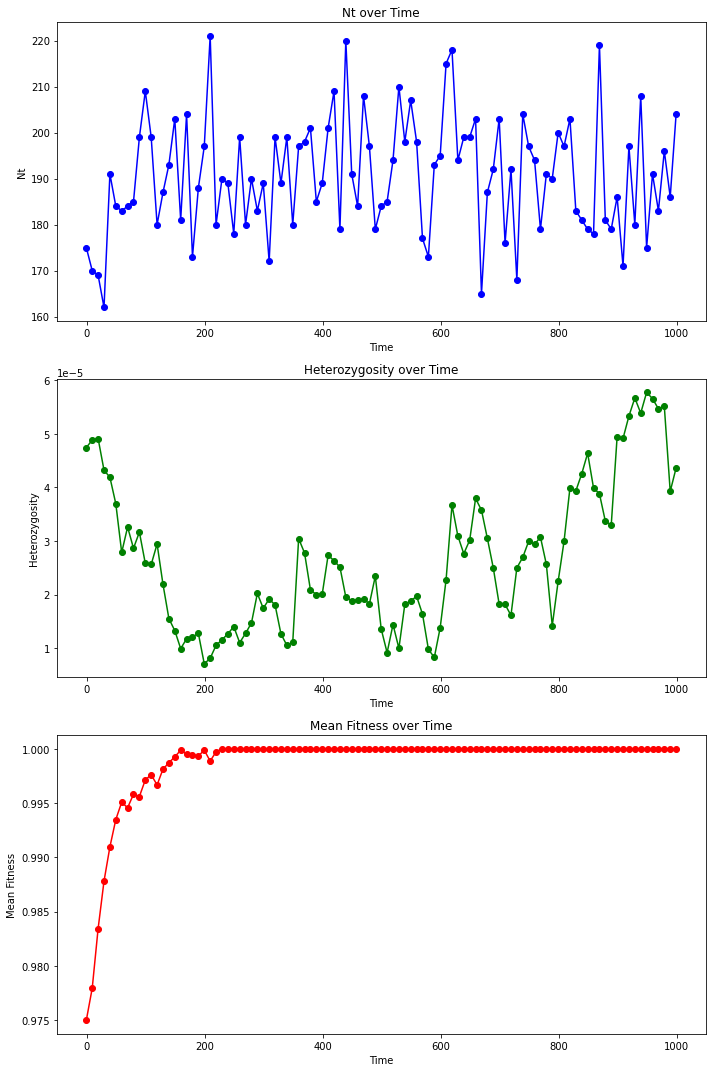

In [63]:
plot_stats(stats)

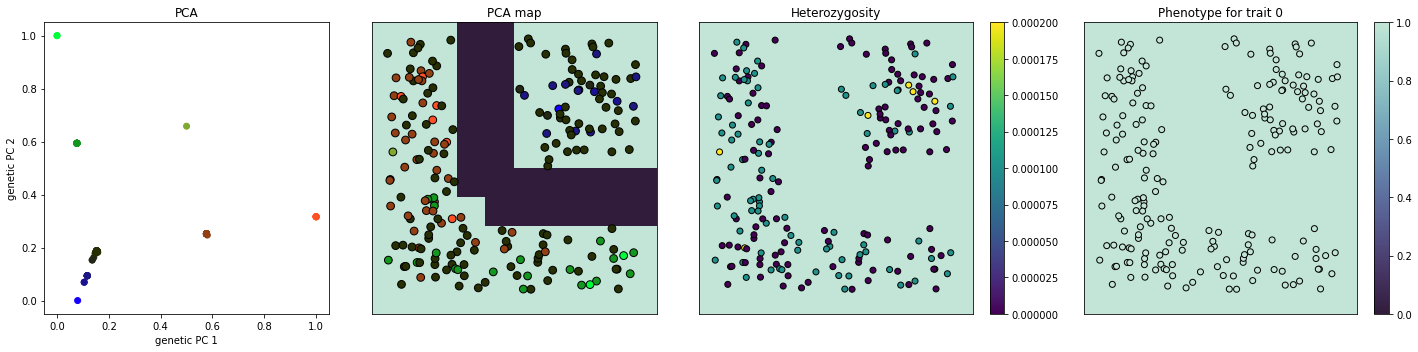

In [64]:
plot_popgen(mod)

In [ ]:
# ADD SOMETHING TO PLOT MULTIPLE SIMULATIONS ON THE SAME PLOT OR WRITE OUT THE RESULTS